<a href="https://hubconexa.com/">
    <img alt="Conexa labs logo" src="./img/conexa_logo.svg" style="height:70px; align:left">
</a>

<h1 align=center><font size=5>Desafio Data Analyst</font></h1>

<h1>Relatório</h1>

<h3>Contexto</h3>

Este relatório foi elaborado como pré-requisito para prosseguimento no processo seletivo para a vaga de analista de dados na companhia Conexa - Hub de Inovação Siagri.

<h2>Sumário</h2>

1) [Introdução](#intro)<br>
2) [Análise exploratória](#data_exploration)<br>
a. [Qual a estrutura do dataset?](#question_1)<br>
b. [Há inconsistências nos dados disponíveis?](#question_2)<br>
c. [Quais as principais características das variáveis?](#question_3)<br>
d. [Qual a frequência de itens por ano?](#question_4)<br>
3) [Tratamento de dados](#data_cleaning)<br>
a. [Eliminação de dados ausentes](#handle_missing)<br>
b. [Eliminação de dados dupilcados](#handle_duplicate)<br>
c. [Substituição de anos incorretos](#wrong_year)<br>
4) [Visualização](#data_visualization)<br>
a. [Jogos mais vendidos](#top_sales)<br>
b. [Total de vendas](#total_sales)<br>
c. [Número de vendas por gênero](#genre_sales)<br>
d. [Editoras mais populares no top 100](#top_publishers)<br>
5) [Conclusão](#conclusion)

<hr>

# 1. Introdução <a id="intro"></a>

<div style="text-align: justify">
Foram disponibilizados dois datasets, sendo necessária a escolha de um deles. O primeiro conjunto de dados é referente à venda de jogos digitais, enquanto que o segundo traz informações sobre os passageiros do navio titanic. O mercado de jogos digitais movimenta <a href="https://www.statista.com/topics/868/video-games/#:~:text=Video%20games%20are%20a%20billion,over%2077%20billion%20U.S.%20dollars.">bilhões de dólares</a> todos os anos. O Brasil é, segundo dados de 2019, o <a href="https://valorinveste.globo.com/objetivo/empreenda-se/noticia/2019/07/30/brasil-e-o-13o-maior-mercado-de-games-do-mundo-e-o-maior-da-america-latina.ghtml">13º maior mercado de jogos no mundo<a>. Há fortes indícios de que o <a href="https://revistapegn.globo.com/Tecnologia/noticia/2020/08/mercado-de-games-escapa-da-crise-e-cresce-com-isolamento-social.html">desenvolvimento de jogos nacional ainda deve crescer bastante</a>. Desse modo, optou-se pela análise do dataset referente à venda de jogos digitais. Com isso, espera-se gerar insights que permitam aos desenvolvedores de jogos nacionais visualizarem formas de otimizar a rentabilidade desse mercado.
</div>

# 2. Análise Exploratória <a id="data_exploration"></a>

### Importação do dataset

<p>
O dataset pode ser encontrado no link: <a href="https://github.com/conexalabs/desafio-data-analyst/blob/main/data/selling_games.parquet">https://github.com/conexalabs/desafio-data-analyst/blob/main/data/selling_games.parquet</a>. 
</p>

In [1]:
!pip install pyarrow

import pandas as pd
import numpy as np

### Leitura dos dados a partir do arquivo

A tabela abaixo indica um resumo sobre os dados importados.

In [2]:
filename = "./data/selling_games.parquet"
df = pd.read_parquet(filename, engine='pyarrow')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### a. Qual a estrutura do dataset?<a id="question_1"></a>

A dimensão do conjunto de dados é apresentada abaixo.

In [3]:
df.shape

(16598, 10)

Pode-se afirmar que existem 16.598 linhas e 10 colunas. A tabela abaixo apresenta um detalhamento das informações contidas em cada coluna.

Campo | Descrição
----- | ---------
Name | Nome do jogo
Platform | Plataforma de lançamento dos jogos (PC, PS4, etc.)
Year | Ano de lançamento do jogo
Genre | Gênero do jogo
Publisher | Editora do jogo
NA_Sales | Vendas na América do Norte (em milhões)
EU_Sales | Vendas na Europa (em milhões)
JP_Sales | Vendas no Japão (em milhões)
Other_Sales | Vendas no resto do mundo (em milhões)
Global_Sales | Total de vendas mundiais.

### b. Há inconsistências nos dados disponíveis? <a id="question_2"></a>

A tabela abaixo apresenta um resumo sobre o dataset.

In [4]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Percebe-se uma discrepância na contagem de valores entre as colunas, o que indica a ausência de dados em algumas linhas.

#### Dados ausentes <a id="missing_data"></a>

A quantidade de dados ausentes por coluna é indicada abaixo.

In [5]:
missing_data = df.isnull().sum()
print(missing_data)

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Baseado nos dados acima, constata-se que das 16.598 linhas, duas colunas apresentaram dados ausentes: 'Year' e 'Publisher'. O gráfico abaixo apresenta a distribuição dos dados ausentes.

In [6]:
!pip install matplotlib-venn

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

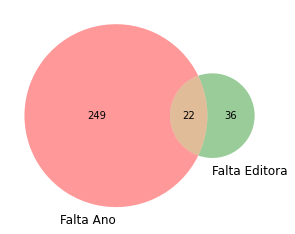

In [7]:
missing_total = df.isnull().any(axis=1).sum()
missing_publisher = missing_total - 271
missing_year = missing_total - 58
missing_both = missing_total - missing_year - missing_publisher

venn2(subsets = (missing_year, missing_publisher, missing_both), set_labels = ('Falta Ano', 'Falta Editora'))
plt.show()

<strong>Total:</strong> 307

Do total de 16.598 linhas, 307 possuem valores ausentes. Dessa forma, surge a necessidade de tratamento dos dados.

#### Dados duplicados <a id="duplicate_data"></a>

A seguir, foi efetuada a análise quanto à presença de linhas duplicadas.

In [8]:
df[df.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


A tabela acima evidencia a presença de uma única duplicata, a qual deve ser removida durante o tratamento de dados. Vale ressaltar que o ano é um dado ausente para esses registros. Dessa forma, é razoável afirmar que esses dois itens serão removidos com a eliminação de dados ausentes.

### c. Quais as principais características das variáveis? <a id="question_3"></a>

#### Tipos

Os tipos de dados de cada coluna são indicados abaixo.

In [9]:
print(df.dtypes)

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


<div style="text-align: justify">
As variáveis nome, plataforma, gênero e editora podem ser consideradas categóricas, enquanto que as demais, quantitativas. A variável ano é do tipo discreta, enquanto que o número de vendas representa um valor contínuo.
</div>

<div style="text-align: justify">
Dados númericos devem, preferencialmente, ser apresentados nos formatos 'float' ou 'int'. Dados categóricos, por outro lado, normalmente são do tipo 'object'. Desse modo, pode-se afirmar que os tipos identificados acima atendem aos requisitos. A coluna 'Year' poderia ser do tipo 'datetime'. No entanto, tendo em vista que apenas o ano foi indicado, não se vislumbra necessidade de efetuar conversão de tipo nessa coluna.
</div>

#### Correlação

O gráfico abaixo indica a correlação entre as variáveis continuas.

<AxesSubplot:>

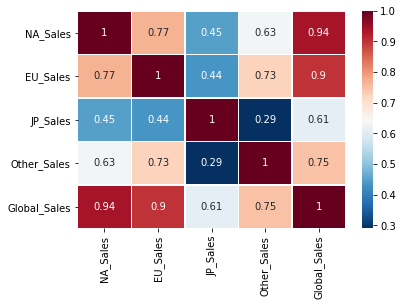

In [10]:
!pip install seab

import seaborn as sns

data = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
corr = data.corr()

sns.heatmap(corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    cmap='RdBu_r',
    annot=True,
    linewidth=0.5)

<div style="text-align: justify">
Analisando os valores, é possível observar que o mercado norte americano e o europeu apresentam um forte relacionamento com o total de vendas globais. Além disso, o mercado japonês apresenta a menor correlação com os demais mercados. Desse modo, é razoável supor que o Japão apresente um mercado predominantemente doméstico. 
</div>

#### Plataformas

É importante avaliar a quantidade de plataformas únicas.

In [11]:
# Importação do pacote com módulos auxiliares
from utils import helpers

In [12]:
helpers.print_unique(df['Platform'])

Total:  31
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


Há 31 plataformas no dataset analisado.

#### Gêneros

Os gêneros presentes no conjunto de dados são indicados a seguir.

É importante ressaltar que não há a presença de dados referentes a jogos de celulares, uma [indústria que movimenta bilhões e tem crescido muito](https://www.ironsrc.com/blog/mobile-gaming-trends/#:~:text=Mobile%20game%20industry%20statistics,38%25%20will%20pay%20for%20games.).

In [13]:
helpers.print_unique(df['Genre'])

Total:  12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


Foram identificados 12 gêneros distintos.

O dataset não considera o valor de vendas oriundo das assinaturas mensais de títulos que adotem essa modalidade, bastante popular no gênero 'MMORPG'.

#### Editoras

As editoras do dataset são relacionadas abaixo.

In [14]:
helpers.print_unique(df['Publisher'])

Total:  578
['10TACLE Studios' '1C Company' '20th Century Fox Video Games' '2D Boy'
 '3DO' '49Games' '505 Games' '5pb' '7G//AMES' '989 Sports' '989 Studios'
 'AQ Interactive' 'ASC Games' 'ASCII Entertainment' 'ASCII Media Works'
 'ASK' 'Abylight' 'Acclaim Entertainment' 'Accolade' 'Ackkstudios'
 'Acquire' 'Activision' 'Activision Blizzard' 'Activision Value'
 'Adeline Software' 'Aerosoft' 'Agatsuma Entertainment' 'Agetec'
 'Aksys Games' 'Alawar Entertainment' 'Alchemist' 'Alternative Software'
 'Altron' 'Alvion' 'American Softworks' 'Angel Studios' 'Answer Software'
 'Aqua Plus' 'Aques' 'Arc System Works' 'Arena Entertainment' 'Aria'
 'Arika' 'ArtDink' 'Aruze Corp' 'Ascaron Entertainment'
 'Ascaron Entertainment GmbH' 'Asgard' 'Asmik Ace Entertainment'
 'Asmik Corp' 'Aspyr' 'Astragon' 'Asylum Entertainment' 'Atari' 'Athena'
 'Atlus' 'Avalon Interactive' 'Avanquest' 'Avanquest Software' 'Axela'
 'BAM! Entertainment' 'BMG Interactive Entertainment' 'BPS' 'Banpresto'
 'Benesse' 'Berkeley'

Foi constatado um total de 578 editoras.

### d. Qual a frequência de itens por ano?

Indica-se abaixo o intervalo disponível no dataset.

In [15]:
helpers.print_unique(df['Year'])

Total:  39
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.]


Pode-se constatar que há uma continuidade dos anos 1980 até 2017. No entanto, não há dados disponíveis para os anos de 2018 e 2019.

A frequência de cada ano é apresentada a seguir:

In [16]:
games_by_year = df['Year'].value_counts()
games_by_year

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Para melhor visualização, foi construído o gráfico a seguir, o qual indica a distribuição de jogos publicados por ano.

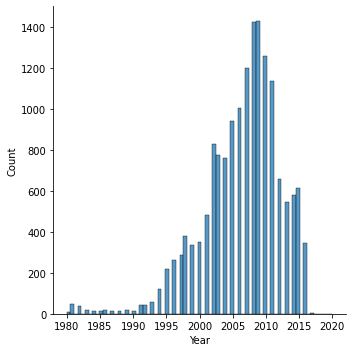

In [17]:
sns.displot(df['Year'])

A pequena quantidade de jogos publicados a partir de 2017 motivou uma investigação nesse sentido. A tabela abaixo apresenta quais jogos foram publicados a partir da referida data.

In [18]:
df[df['Year'] >= 2017]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


Foi descoberto que o ano de publicação desses 4 títulos não corresponde à realidade. O jogo 'Imagine: Makeup Artist', por exemplo, [foi lançado em 2009](https://pt.wikipedia.org/wiki/Imagine_(s%C3%A9rie)). Enquanto isso, o título 'Phantasy Star Online 2 Episode 4: Deluxe Package' [teve seu lançamento em 2016](https://www.play-asia.com/phantasy-star-online-2-episode-4-deluxe-package/13/709stt). Da mesma forma, o título 'Brothers Conflict: Precious Baby' [foi publicado no ano de 2016](https://en.wikipedia.org/wiki/Brothers_Conflict) para o console PS Vita. 

Desse modo, faz-se necessária a correção desses dados durante a fase de tratamento.

Vale ressaltar que a ausência de dados referentes aos anos 2017 a 2020 pode representar um fator limitante à análise.

# 3. Tratamento de dados <a id="data_cleaning"></a>

### a. Eliminação de dados ausentes <a id="handle_missing"></a>

Optou-se pela eliminação das linhas nas quais o ano ou editora não estivessem presentes.

In [19]:
df.dropna(subset=["Year", "Publisher"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(16291, 10)

Após a modificação, o número de registros foi reduzido de 16.598 para 16.291. A redução de 307 linhas é equivalente ao total de linhas com dados ausentes indicado no diagrama de venn da [seção b do capítulo 2](#duplicate_data)

### b. Eliminação de dados duplicados <a id="handle_duplicate"></a>

Conforme citado na [seção b do capítulo 2](#duplicate_data), a eliminação de registros com dados nulos assegura a remoção dos dados duplicados encontrados. Isso se deve ao fato de que foi encontrada apenas uma linha duplicada, a qual não apresentava o dado referente ao ano de publicação.

### c. Substituição de anos incorretos <a id="wrong_year"></a>

Constatou-se a incorreção de dados referentes ao ano na [seção d do capítulo 2](#question_4). A tabela abaixo indica o ano indicado e o ano verdadeiro para publicação dos títulos:

Nome | Plataforma | Ano indicado | Ano real
--------- | ------ |  ----- | -----
Imagine: Makeup Artist | DS | 2020 | 2009
Phantasy Star Online 2 Episode 4: Deluxe Package | PS4 | 2017 | 2016
Phantasy Star Online 2 Episode 4: Deluxe Package | PSV | 2017 | 2016
Brothers Conflict: Precious Baby | PSV | 2017 | 2016

Procedeu-se à modificação do ano para os registros indicados.

In [20]:
# O array indica os índices desejados em ordem crescente
rows = df[df['Year'] >= 2017].index.to_numpy()
print(rows)   

[ 5860 14136 15944 16135]


In [21]:
# Anos reais de publicação, dispostos na mesma ordem do array anterior
correct_years = [2009, 2016, 2016, 2016]

In [39]:
for i, index in enumerate(rows):
    df.loc[index, 'Year'] = correct_years[i]
    print(df['Year'][index])

2009.0
2016.0
2016.0
2016.0


Após essa substituição, foi finalizado o tratamento de dados.

# 4. Visualização <a id="visualization"></a>

### a. Jogos mais vendidos <a id="top_sales"></a>

#### Desde 1980

O gráfico abaixo apresenta os 10 jogos mais vendidos durante todo o período avaliado.

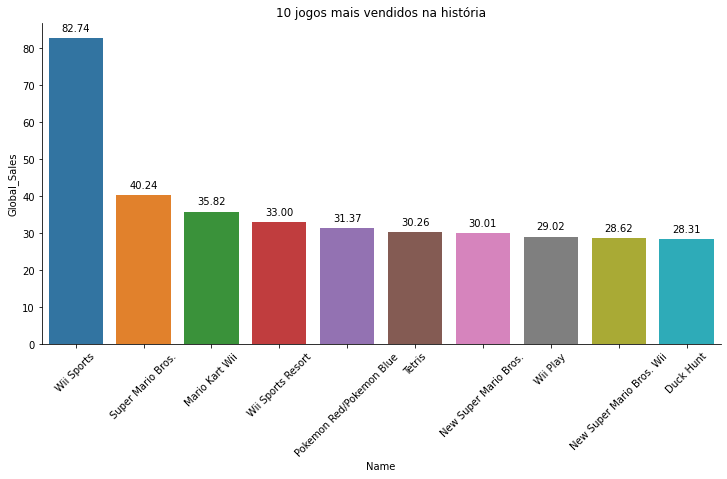

In [23]:
x = 'Name'
y = 'Global_Sales'

total_sales = df[[x, y]].groupby('Name').agg(['sum'])

top10 = helpers.extract_top(df, 10, y)

g = helpers.plot_bars(top10, x, y)
helpers.annotate_bars(g)

plt.xticks(rotation=45)
plt.title("10 jogos mais vendidos na história")
plt.show()

A tabela abaixo indica o ano de lançamento desses jogos.

In [24]:
top10.sort_values(by='Year').reset_index()

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
3,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
4,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
5,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
6,7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
7,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
8,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


É evidente o fato de que todos os títulos foram lançados há mais de 10 anos, tendo sido 4 deles lançados no século passado. Além disso, todos os títulos foram publicados pela mesma editora: Nintendo.  

#### Desde 2010

A fim de se buscar uma representação mais recente dos dados, optou-se pela segmentação do período analisado, isto é, a partir do ano 2010.

In [40]:
df_recent = df[df['Year'] >= 2010]
df_recent.shape

(5133, 10)

Após a filtragem, restaram 5133 registros.

A tabela abaixo indica os 10 jogos mais vendidos desde 2010. De forma a contabilizar jogos multiplaforma, foi efetuada a agregação de dados sobre vendas 

In [41]:
recent_sales = df_recent[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
recent_sales = recent_sales.groupby('Name', as_index=False).agg(['sum']).reset_index()

recent_top10 = helpers.extract_top(recent_sales, 10, ('Global_Sales', 'sum'))
recent_top10.reset_index()

,index,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,,,sum,sum,sum,sum,sum
0,1013,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
1,325,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
2,323,Call of Duty: Black Ops II,14.08,11.05,0.72,3.88,29.72
3,321,Call of Duty: Black Ops,17.01,8.69,0.59,3.12,29.40
4,324,Call of Duty: Ghosts,14.92,9.05,0.48,2.92,27.38
5,322,Call of Duty: Black Ops 3,11.89,9.56,0.43,3.42,25.32
6,1666,Minecraft,10.82,8.85,1.15,2.93,23.73
7,320,Call of Duty: Advanced Warfare,10.44,8.18,0.34,2.93,21.90
8,1366,Kinect Adventures!,14.97,4.94,0.24,1.67,21.82


Constata-se que 6 dos 10 títulos pertencem à franquia 'Call of Duty', um jogo do tipo 'Shooter' multiplataforma. Desse modo, é razoável supor que jogos de tiro estejam entre os mais populares.

### b. Total de vendas por plataforma e região <a id="total_sales"></a>

#### Global

O gráfico abaixo indica a variação no número de vendas globais, por plataforma, a partir do ano de 2010.

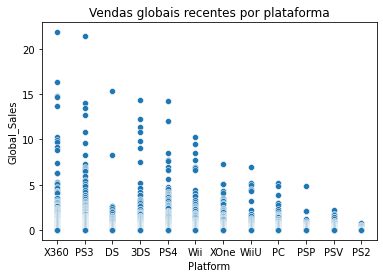

In [28]:
sns.scatterplot(x="Platform", y="Global_Sales", data=df_recent)
plt.title("Vendas globais recentes por plataforma")
plt.show()

É possível notar que as plataformas PSP, PSV e PS2 apresentaram um intervalo no número de vendas significativamente menor do que os outros dispositivos. Isso Pode significar que esses consoles estariam se dirigindo a um estado de obsolescência.

#### América do Norte

As vendas segmentadas por plataforma para o mercado norte americano são apresentadas abaixo.

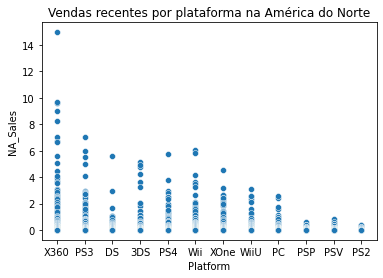

In [29]:
sns.scatterplot(x="Platform", y="NA_Sales", data=df_recent)
plt.title("Vendas recentes por plataforma na América do Norte")
plt.show()

<div style="text-align: justify;">
Entre os consoles de mesma geração, títulos para o X360 apresenta uma variação no número de vendas maior do que o PS3. É possível afimar que o mercado norte-americano apresenta uma tendência semelhante à identificada para o mercado global. Isso significaria que essa região pode possuir elevada importância no contexto mundial para venda de jogos digitais.
</div>

#### Europa

As vendas por plataforma para o mercado europeu são indicadas no gráfico abaixo.

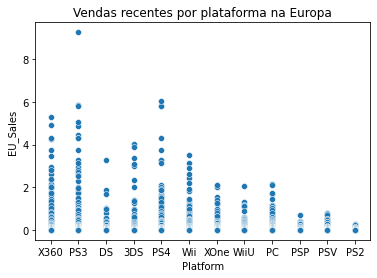

In [30]:
sns.scatterplot(x="Platform", y="EU_Sales", data=df_recent)
plt.title("Vendas recentes por plataforma na Europa")
plt.show()

<div style="text-align: justify">
Diferente da América do Norte, a plataforma PS3 apresenta uma variação no número de vendas de jogos maior do que o X360, console de mesma geração. Por outro lado, a tendência observada na região se assemelha à apresentada para o mercado global. Isso pode significar que a região também possui grande importância no total de vendas mundiais.
</div>

#### Japão

As vendas por plataforma para o mercado japonês são indicadas a seguir.

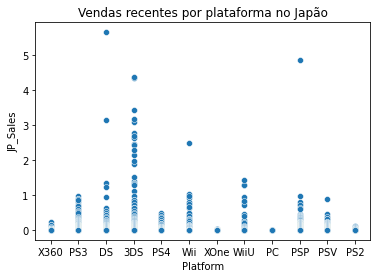

In [31]:
sns.scatterplot(x="Platform", y="JP_Sales", data=df_recent)
plt.title("Vendas recentes por plataforma no Japão")
plt.show()

<div style="text-align: justify;">
É bastante notória a percepção de que o mercado japonês destoa dos norte-americano e europeu. Há indícios de que houve, nos últimos anos, uma preferência pelas plataformas 3DS, Wii e WiiU. Diferente do observado nas demais regiões, jogos para os consoles X360, XOne, PC, PS3 e PS4 apresentaram um volume de vendas significativamente inferior.
</div>

#### Outras regiões

O gráfico abaixo indica o número de vendas por plataforma para as demais regiões do mundo.

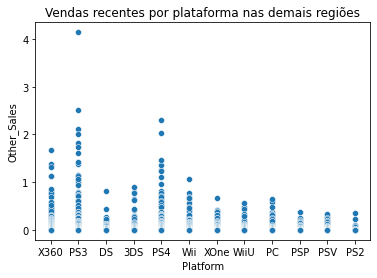

In [32]:
sns.scatterplot(x="Platform", y="Other_Sales", data=df_recent)
plt.title("Vendas recentes por plataforma nas demais regiões")
plt.show()

<div style="text-aligh: justify;"></a>
Observa-se uma tendência bastante semelhante à apresentada nos mercados da América do Norte e Europa. As plataformas preferênciais seriam PS3, PS4 e X360. A aplicabilidade dessa distribuição contudo é limitada para o mercado brasileiro. Uma maior segmentação dos dados, indicando os países, permitiria uma análise mais pormenorizada.
</div>

### c. Número de vendas por gênero <a id="genre_sales"></a>

#### Global

O gráfico abaixo indica o total de vendas por gênero em todo o mundo.

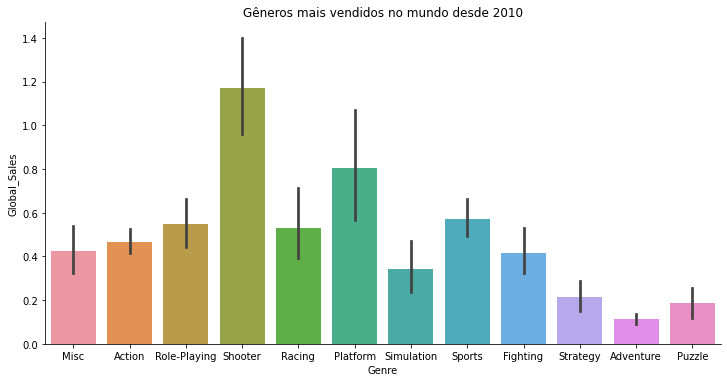

In [44]:
helpers.plot_bars(df_recent, 'Genre', 'Global_Sales')
plt.title("Gêneros mais vendidos no mundo desde 2010")
plt.show()

É possível notar que os gêneros mais populares no mundo seriam 'Shooter', 'Platform' e 'Sports'.

#### América do Norte

Os generos mais vendidos no mercado norte-americano são indicados abaixo.

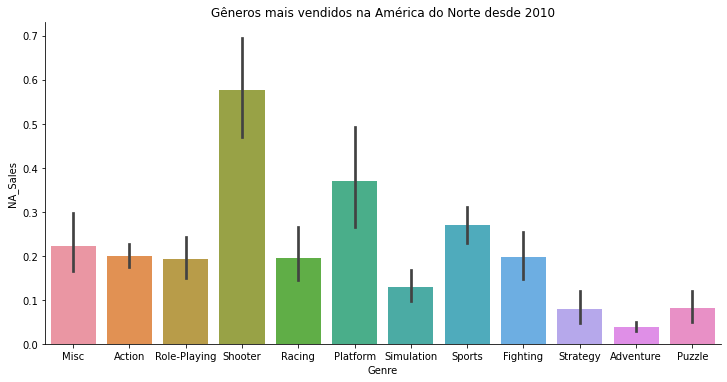

In [34]:
g = helpers.plot_bars(df_recent, 'Genre', 'NA_Sales')

plt.title("Gêneros mais vendidos na América do Norte desde 2010")
plt.show()

Mais uma vez, o mercado norte-americano segue a tendência do mercado mundial. Os 3 gêneros mais populares nessa região são os mesmos para as vendas globais. Isso é um indicativo de que o país oferece uma elevada contribuição na venda de jogos digitais.

#### Europa

O mercado europeu de jogos digitais é representado pelo gráfico a seguir.

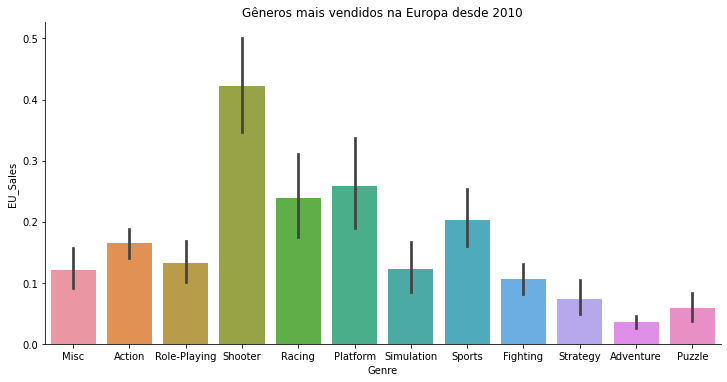

In [35]:
helpers.plot_bars(df_recent, 'Genre', 'EU_Sales')
plt.title("Gêneros mais vendidos na Europa desde 2010")
plt.show()

Os tipos de jogos mais vendidos nessa região seriam 'Shooter' e 'Platform'. Nessa situação, o terceiro colocado seria 'Racing', ao invés de 'Sports', como nas vendas globais e norte-americanas.

#### Japão

As vendas por gênero no Japão são indicadas abaixo.

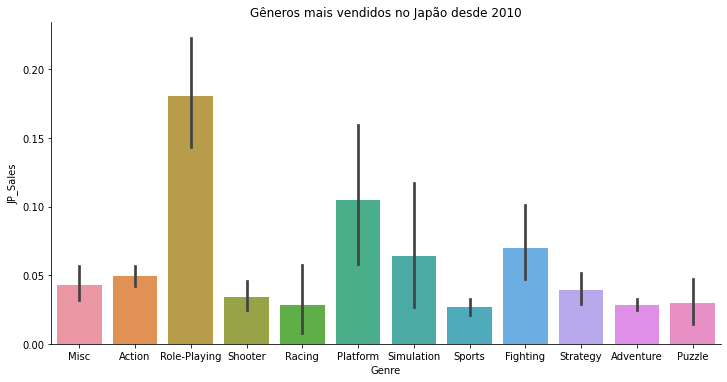

In [36]:
helpers.plot_bars(df_recent, 'Genre', 'JP_Sales')
plt.title("Gêneros mais vendidos no Japão desde 2010")
plt.show()

Mais uma vez, as particularidades do mercado japonês se evidenciam. Observa-se que, diferente das demais regiões, o gênero mais popular no país seria 'Role-Playing'. 'Platform' e 'Fighting' são o segundo e terceiro gêneros mais populares respectivamente.

#### Outras Regiões

É possível visualizar as vendas, segmentadas por gênero, para as demais regiões no mundo.

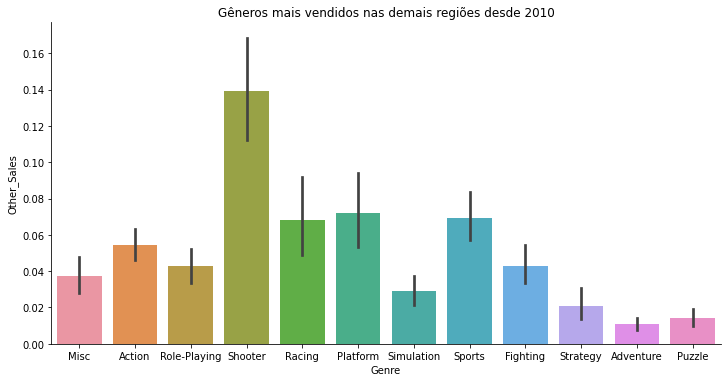

In [37]:
helpers.plot_bars(df_recent, 'Genre', 'Other_Sales')
plt.title("Gêneros mais vendidos nas demais regiões desde 2010")
plt.show()

Há motivos para acreditar que os gêneros mais populares, nas demais regiões do mundo, seriam 'Shooter', 'Platform', 'Sports' e 'Racing'.

### d. Editoras mais populares no top 100 <a id="top_pulishers"></a>

O gráfico abaixo indica a distribuição de editoras para os 100 jogos mais vendidos em todo o mundo desde 2010.

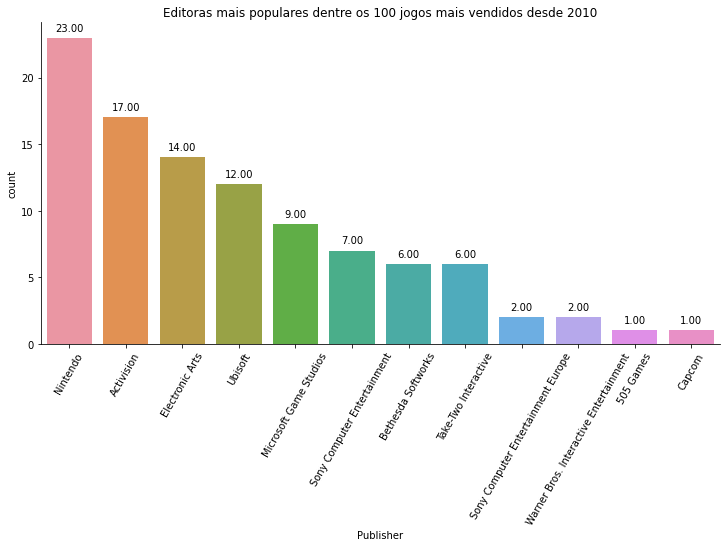

In [38]:
x = 'Publisher'
y = 'count'

top100 = helpers.extract_top(df_recent, 1000, 'Global_Sales').head(100)
top_publishers = top100.groupby("Publisher").size().reset_index(name='count')
top_publishers = top_publishers.sort_values(by='count', ascending=False)

g = helpers.plot_bars(top_publishers, x, y)
helpers.annotate_bars(g)

plt.xticks(rotation=60)
plt.title("Editoras mais populares dentre os 100 jogos mais vendidos desde 2010")
plt.show()

Foi constatado anteriormente que a Nintendo havia publicado os 10 jogos mais populares de toda a história. Mesmo após restringir a análise de dados ao período a partir de 2010, a editora ainda se mostra extremamente relevante no cenário global. A seguir, 'Activision', 'Electronic Arts' e 'Ubisoft' seriam as editoras mais relevantes na atualidade.

# 5. Conclusão <a id="conclusion"></a>

<div style="text-align: justify;">
O dataset escolhido apresenta dados referentes à venda de jogos digitais no mundo e também em 04 regiões: América do Norte, Europa, Japão e Demais Regiões. A escolha desse conjunto de dados se deve ao fato de que o mercado de desenvolvimento de jogos tem crescido no Brasil. Desse modo, é importante oferecer insights aos desenvolvedores, de modo que eles possam otimizar a rentabilidade dessa indústria no país.
</div>

<div style="text-align: justify;">
Há um total de 16.598 registros, distribuídos ao longo de 10 colunas. Dentre as variáveis categóricas, foram identificadas 31 plataformas, 12 gêneros e 578 editoras. Não foi identificado relacionamento linear entre essas variáveis e o número de vendas. Não há registro da venda de jogos para celulares, mercado que tem se mostrado bastante promissor nos últimos anos. Além disso, o dataset não contabiliza o modelo de negócios baseado em assinaturas, adotado principalmente por jogos do gênero 'MMORPG'.
</div>

<div style="text-align: justify;">
Durante a análise exploratória, foram constatadas inconsistências de dados. Mais especificamente, constatou-se a presença de 307 linhas com dados nulos, nas colunas 'Year' e 'Publisher'. Além disso, foi encontrada uma duplicata, a qual também não apresentava o ano de publicação. Ambas inconsistências foram tratadas por meio da remoção de dados nulos, a qual reduziu o número de registros de 16.598 para 16.291.
</div>

<div style="text-align: justify;">
O ano de publicação dos jogos varia de 1980 até 2020. Foi possível constatar que apenas 3 títulos teriam sido lançados em 2017 e apenas 1, em 2020. Ao efetuar uma pesquisa sobre esses jogos, contudo, foi constatado que o ano indicado no dataset estava incorreto. Por esse motivo, os 4 registros foram devidamente corrigidos com o seu ano correto de lançamento.
</div>

Todos os 10 jogos mais vendidos de todos os tempos foram lançados antes de 2010 pela mesma editora: Nintendo. Na tentativa de avaliar a situação mais recente do mercado de jogos digitais, optou-se por segmentar a maior parte das visualizações para os anos a partir de 2010.

<div style="text-align: justify;">
Os dados analisados não apresentam informações específicas sobre o mercado brasileiro de jogos digitais. Uma maior segmentação das informações, indicando, por exemplo, o país de venda, permitiria uma análise mais profunda. De qualquer modo, procurou-se avaliar os dados para os mercados norte-americano, europeu e das demais regiões do mundo. Buscou-se traçar paralelos que pudessem ser aplicados à indústria de jogos digitais nacional.
</div>

<div style="text-align: justify;">
Pode-se concluir que jogos dos gêneros 'Shooter', 'Platform', 'Sports' e 'Racing' seriam os mais populares nos mercados com características semelhantes ao Brasil. Dessa forma, sugere-se que seja avaliada a viabilidade de se publicar títulos que mesclem esses 04 gêneros. Um jogo de tiro, do tipo plataforma, com elementos de corrida, por exemplo, poderia receber grande aceitação por parte do público brasileiro.
</div>

<div style="text-align: justify;">
Além disso, parcela significativa dos jogos mais populares, desde o ano de 2010, foram lançados em múltiplas plataformas. Por esse motivo, indica-se que desenvolvedores nacionais procurem oferecer jogos multi-plataforma.
</div>